In [50]:
# images will be ploted using matplotlib
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [51]:
#Haar cascades to locate face and eyes in the image
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [52]:
#reading the image and processing it
image = cv2.imread(r'C:\Users\steph\OneDrive\Desktop\openCV\amanda.jpg')
image_BGR = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  #GPT only tells you to use the gray image
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

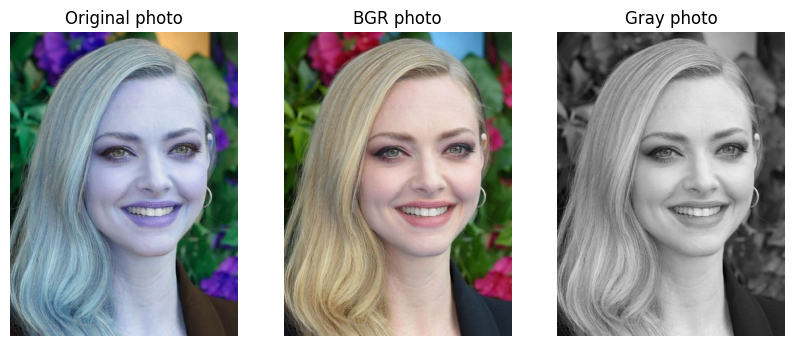

In [53]:
#visualizing the 3 images 
plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
plt.title('Original photo')
plt.imshow(image)
plt.axis('off')

plt.subplot(1,3,2)
plt.title('BGR photo')
plt.imshow(image_BGR)
plt.axis('off')

plt.subplot(1,3,3)
plt.title('Gray photo')
plt.imshow(gray_image, cmap='gray')
plt.axis('off')

plt.show()

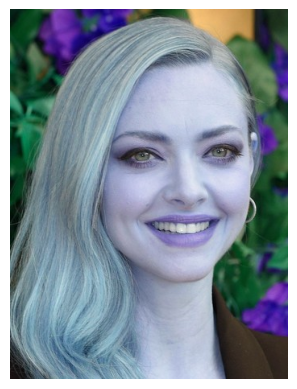

(460, 345, 3)

In [54]:
plt.imshow(image)
plt.axis('off')
plt.show()
image.shape

In [55]:
faces = face_cascade.detectMultiScale(gray_image, 1.1, 4)
for (x, y, w, h) in faces:
    face_box = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)  # detecting face and drawing green box around it
    roi_gray = gray_image[y:y + h, x:x + w]   # Cropping to Region of Interest 
    roi_color = image[y:y + h, x:x + w]

print(f"ROI (gray) shape: {roi_gray.shape}")
print(f"ROI (color) shape: {roi_color.shape}")

ROI (gray) shape: (229, 229)
ROI (color) shape: (229, 229, 3)


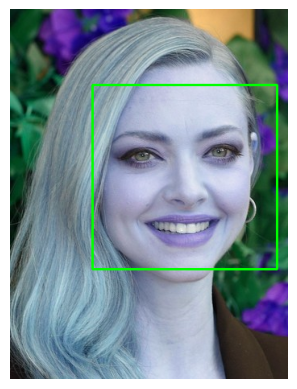

In [56]:
# plotting the image and face box
plt.imshow(face_box)
plt.axis('off')
plt.show()

In [61]:
#detecting the eyes and reporting how many are detected
eyes = eye_cascade.detectMultiScale(roi_color)
if len(eyes) == 0:
    print("No eyes detected!")
else:
    print(f"Detected {len(eyes)} eye(s).")
    # For each detected eye, process the color

Detected 2 eye(s).


In [62]:
for (ex, ey, ew, eh) in eyes:
    eye_box = cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2) # detecting eyes and drawing green box around them
    eye_roi = roi_color[ey:ey + eh, ex:ex + ew] # Cropping ROI
    hsv_eye = cv2.cvtColor(eye_roi, cv2.COLOR_BGR2HSV) #Processing image to better analyze eye color

    lower_blue = np.array([100, 50, 50])  #defining upper and lower thresholds for color assignment
    upper_blue = np.array([130, 255, 255])
    lower_brown = np.array([10, 100, 20])
    upper_brown = np.array([20, 255, 200])
    lower_green = np.array([40, 40, 40])
    upper_green = np.array([80, 255, 255])

    mask_blue = cv2.inRange(hsv_eye, lower_blue, upper_blue) # checking if pixels are within the defined threshold and creates binary mask
    mask_brown = cv2.inRange(hsv_eye, lower_brown, upper_brown)
    mask_green = cv2.inRange(hsv_eye, lower_green, upper_green)

    blue_pixels = cv2.countNonZero(mask_blue) #counting pixels in the eye ROI binary mask that correspond to Blue
    brown_pixels = cv2.countNonZero(mask_brown)
    green_pixels = cv2.countNonZero(mask_green)

if blue_pixels > brown_pixels and blue_pixels > green_pixels:
    print("Eye color: Blue")
elif brown_pixels > blue_pixels and brown_pixels > green_pixels:
    print("Eye color: Brown")
elif green_pixels > blue_pixels and green_pixels > brown_pixels:
    print("Eye color: Green")
else:
    print("Eye color: Undetermined")
    

Eye color: Green


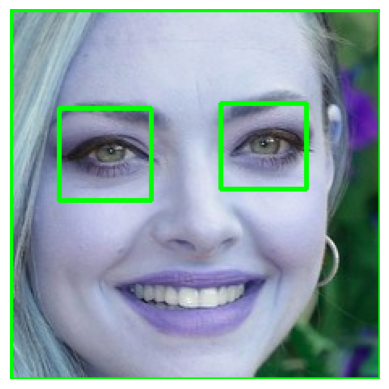

In [59]:
# plotting the eye boxes
plt.imshow(eye_box)
plt.axis('off')
plt.show()

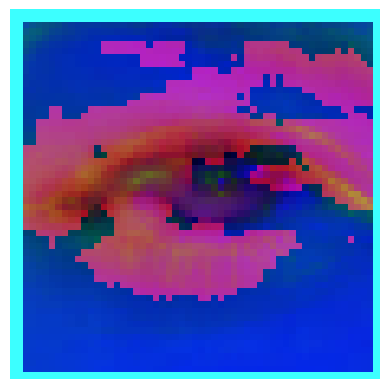

In [60]:
#plotting the hsv image of eye box
plt.imshow(hsv_eye)
plt.axis('off')
plt.show()